In [ ]:
# Mounting the drive to load the data from drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/NLP assignment3/'

/content/drive/MyDrive/NLP assignment3


In [ ]:
import pandas as pd

# Update the path if needed
df = pd.read_csv('/content/drive/MyDrive/NLP assignment3/fomc_transcripts_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Content'])


In [ ]:
df

,URL,Date,Year,Month,Day,Source,Content,cleaned_text
0,https://www.federalreserve.gov/monetarypolicy/...,2025-03-19,2025,3,19,Main Calendar,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...
1,https://www.federalreserve.gov/monetarypolicy/...,2025-03-19,2025,3,19,Main Calendar,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...
2,https://www.federalreserve.gov/monetarypolicy/...,2025-03-19,2025,3,19,Main Calendar,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...
3,https://www.federalreserve.gov/monetarypolicy/...,2025-01-29,2025,1,29,Main Calendar,Please enable JavaScript if it is disabled in ...,please enable javascript if it is disabled in ...
4,https://www.federalreserve.gov/monetarypolicy/...,2025-01-29,2025,1,29,Main Calendar,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...
...,...,...,...,...,...,...,...,...
123,https://www.federalreserve.gov/monetarypolicy/...,2015-06-17,2015,6,17,Historical Archive,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...
124,https://www.federalreserve.gov/monetarypolicy/...,2015-04-29,2015,4,29,Historical Archive,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...
125,https://www.federalreserve.gov/monetarypolicy/...,2015-03-18,2015,3,18,Historical Archive,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...
126,https://www.federalreserve.gov/monetarypolicy/...,2015-03-18,2015,3,18,Historical Archive,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...


In [ ]:
import pandas as pd

# 1) Convert the 'Date' column from object (string) to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 2) (Optional) Drop or inspect rows where conversion failed
# print(df[df['Date'].isna()])

# 3) Sort the DataFrame by the new datetime 'Date' column in descending order
df = df.sort_values(by='Date', ascending=False)

# 4) (Optional) Reset index if you want a clean integer index
df = df.reset_index(drop=True)

# Now df['Date'] is a datetime dtype and the rows are sorted newest → oldest
#print(df[['doc_id', 'Date']].head())

In [ ]:
# 1) Make sure your index is reset 0…N‑1
df = df.reset_index(drop=True)

# 2) Rebuild doc_id as "doc1", "doc2", … up to "docN"
df['doc_id'] = 'doc' + (df.index + 1).astype(str)

# 3) Check
print(df[['doc_id', 'Date']].head())

  doc_id       Date
0   doc1 2025-03-19
1   doc2 2025-03-19
2   doc3 2025-03-19
3   doc4 2025-01-29
4   doc5 2025-01-29


In [ ]:
df

,URL,Date,Year,Month,Day,Source,Content,cleaned_text,doc_id
0,https://www.federalreserve.gov/monetarypolicy/...,2025-03-19,2025,3,19,Main Calendar,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...,doc1
1,https://www.federalreserve.gov/monetarypolicy/...,2025-03-19,2025,3,19,Main Calendar,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...,doc2
2,https://www.federalreserve.gov/monetarypolicy/...,2025-03-19,2025,3,19,Main Calendar,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...,doc3
3,https://www.federalreserve.gov/monetarypolicy/...,2025-01-29,2025,1,29,Main Calendar,Please enable JavaScript if it is disabled in ...,please enable javascript if it is disabled in ...,doc4
4,https://www.federalreserve.gov/monetarypolicy/...,2025-01-29,2025,1,29,Main Calendar,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...,doc5
...,...,...,...,...,...,...,...,...,...
123,https://www.federalreserve.gov/monetarypolicy/...,2015-06-17,2015,6,17,Historical Archive,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...,doc124
124,https://www.federalreserve.gov/monetarypolicy/...,2015-04-29,2015,4,29,Historical Archive,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...,doc125
125,https://www.federalreserve.gov/monetarypolicy/...,2015-03-18,2015,3,18,Historical Archive,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...,doc126
126,https://www.federalreserve.gov/monetarypolicy/...,2015-03-18,2015,3,18,Historical Archive,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...,doc127


In [ ]:
!pip install --upgrade transformers
!pip install --upgrade torch
!pip install --upgrade spacy

In [ ]:
!pip install --upgrade torchvision

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

import torch
from transformers import AutoTokenizer, AutoModel
import spacy

# Load spaCy for sentence segmentation
nlp = spacy.load("en_core_web_sm")

# Load FinBERT‑tone tokenizer & model
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model     = AutoModel.from_pretrained("yiyanghkust/finbert-tone")
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30873, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

IMPORTS, NLP & CHUNKING STRATEGY (450‑TOKEN, SENTENCE‑PRESERVED)

In [ ]:

def chunk_document(text: str,
                   max_tokens: int = 450,
                   overlap: int = 0
                  ) -> list[str]:
    """
    Split `text` into chunks of ≤ max_tokens (by tokenizer count),
    preserving whole sentences. Overlap = number of tokens to
    re‑use between consecutive chunks.
    """
    sentences = [sent.text.strip() for sent in nlp(text).sents]
    chunks, current, current_len = [], [], 0

    for sent in sentences:
        sent_len = len(tokenizer.tokenize(sent))
        if current_len + sent_len > max_tokens:
            chunks.append(" ".join(current))
            if overlap > 0 and current:
                # keep last `overlap` tokens as starting point
                ov_tokens = tokenizer.tokenize(" ".join(current))[-overlap:]
                ov_text = tokenizer.convert_tokens_to_string(ov_tokens)
                current = [ov_text]
                current_len = len(ov_tokens)
            else:
                current, current_len = [], 0
        current.append(sent)
        current_len += sent_len

    if current:
        chunks.append(" ".join(current))
    return chunks

def embed_texts(texts: list[str], max_length: int = 450) -> torch.Tensor:
    """
    Embed each text chunk by mean‑pooling token embeddings.
    `max_length` ensures we pad/truncate to the chunk size.
    Returns a (n_chunks × hidden_size) tensor.
    """
    embeddings = []
    with torch.no_grad():
        for txt in texts:
            inputs = tokenizer(
                txt,
                padding="max_length",
                truncation=True,
                max_length=max_length,
                return_tensors="pt"
            ).to(device)
            outputs = model(**inputs).last_hidden_state  # [1, L, H]
            mask = inputs["attention_mask"].unsqueeze(-1)  # [1, L, 1]
            summed = (outputs * mask).sum(dim=1)
            counts = mask.sum(dim=1)
            embeddings.append((summed / counts).squeeze(0))
    return torch.stack(embeddings)

# === USAGE ===
# 1. Break each document into 450‑token chunks
docs = df["cleaned_text"].tolist()
docs_chunks = [chunk_document(doc, max_tokens=450, overlap=0) for doc in docs]

# 2. Flatten for embedding
all_chunks = [chunk for sublist in docs_chunks for chunk in sublist]

# 3. Compute embeddings on 450‑token chunks
chunk_embeddings = embed_texts(all_chunks, max_length=450)



DIMENSIONALITY REDUCTION WITH UMAP (CHUNK EMBEDDINGS)

In [12]:

import umap
import numpy as np

# Convert the PyTorch tensor to NumPy for UMAP
chunk_embeddings_np = chunk_embeddings.cpu().numpy()

# Configure UMAP to reduce our 450‑token chunk embeddings to 5 dimensions
umap_reducer = umap.UMAP(
    n_neighbors=15,        # how many nearby chunks to consider
    n_components=5,        # target dimensionality
    metric="cosine",       # cosine distance on embedding space
    random_state=42
)

# Fit UMAP on chunk-level embeddings
umap_embeddings = umap_reducer.fit_transform(chunk_embeddings_np)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


CLUSTERING WITH HDBSCAN (ON UMAP‑REDUCED CHUNKS)

In [13]:

import hdbscan

# HDBSCAN will discover dense topic clusters in the reduced UMAP space
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=15,           # minimum chunks per cluster
    metric="euclidean",            # distance in UMAP space
    cluster_selection_method="eom" # cluster selection algorithm
)

# Fit & predict cluster labels for each chunk
cluster_labels = clusterer.fit_predict(umap_embeddings)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 TOPIC REPRESENTATION USING MANUAL c‑TF‑IDF + MMR (NO BERTopic DEPENDENCY)

In [14]:

import numpy as np
from scipy.sparse import csr_matrix
from scipy.spatial.distance import cosine
from sklearn.feature_extraction.text import CountVectorizer

# STEP 1: Build Chunk-Term Matrix
vectorizer = CountVectorizer(stop_words="english")
dtm_chunks = vectorizer.fit_transform(all_chunks)  # (n_chunks × n_terms)
terms = vectorizer.get_feature_names_out().tolist()

# STEP 2: Manual c-TF-IDF Calculation
def compute_c_tf_idf(dtm: csr_matrix, labels: list[int]):
    """
    Compute class-based TF-IDF (c-TF-IDF) from a document-term matrix.
    """
    cluster_ids = sorted(set(labels))
    n_clusters = len(cluster_ids)

    tf = []
    for cid in cluster_ids:
        idx = [i for i, lbl in enumerate(labels) if lbl == cid]
        tf_c = np.array(dtm[idx, :].sum(axis=0)).reshape(-1)  # (n_terms,)
        tf.append(tf_c)
    tf = np.stack(tf)  # (n_clusters × n_terms)

    df = np.sum(tf > 0, axis=0)
    idf = np.log((n_clusters + 1) / (df + 1)) + 1

    return tf * idf, cluster_ids

ctfidf_matrix, cluster_list = compute_c_tf_idf(dtm_chunks, cluster_labels)

# STEP 3: Embed Terms (use existing FinBERT embed_texts from Block 1)
term_embeddings = embed_texts(terms, max_length=32).cpu().numpy()

# STEP 4: MMR Implementation
def mmr(candidates: list[str],
        scores: np.ndarray,
        embeddings: np.ndarray,
        top_n: int = 10,
        diversity: float = 0.7):
    """
    Select top_n terms balancing relevance and diversity using MMR.
    """
    selected, unselected = [], list(range(len(candidates)))

    min_s, max_s = scores.min(), scores.max()
    norm_scores = (scores - min_s) / (max_s - min_s + 1e-9)

    while len(selected) < min(top_n, len(unselected)):
        best_score, best_idx = None, None
        for idx in unselected:
            rel = norm_scores[idx]
            if selected:
                sim = max(1 - cosine(embeddings[idx], embeddings[s]) for s in selected)
            else:
                sim = 0
            mmr_score = diversity * rel - (1 - diversity) * sim
            if best_score is None or mmr_score > best_score:
                best_score, best_idx = mmr_score, idx
        selected.append(best_idx)
        unselected.remove(best_idx)
    return [candidates[i] for i in selected]

# STEP 5: Generate Topic Labels
topic_labels = {}
for i, cid in enumerate(cluster_list):
    if cid == -1:
        topic_labels[cid] = "Outliers"
        continue
    term_scores = ctfidf_matrix[i]
    top_terms = mmr(terms, term_scores, term_embeddings, top_n=10, diversity=0.7)
    topic_labels[cid] = " ".join(top_terms)


ASSIGN TOPICS TO CHUNKS & AGGREGATE BACK TO DOCUMENTS

In [15]:

import pandas as pd

# Build a DataFrame of chunks with their cluster labels
chunks_df = pd.DataFrame({
    "doc_idx":       [i for i, sub in enumerate(docs_chunks) for _ in sub],
    "chunk_text":    all_chunks,
    "cluster_id":    cluster_labels
})
# Map cluster ID → human‑readable topic name
chunks_df["topic_label"] = chunks_df["cluster_id"].map(topic_labels)

# Aggregate chunk‑level topics to each original document by majority vote
doc_topics = (
    chunks_df
    .groupby("doc_idx")["topic_label"]
    .agg(lambda lbls: lbls.value_counts().idxmax())
    .to_dict()
)
# Assign final topic per document in the original df
df["topics"] = df.index.to_series().map(doc_topics)


PLOT TOPIC EVOLUTION OVER TIME WITH PLOTLY (USING 'Date' COLUMN)

In [33]:
import plotly.express as px

# STEP 1: Ensure Date column is datetime
df["Date"] = pd.to_datetime(df["Date"])

# STEP 2: Group by quarter & topic
df["Quarter"] = df["Date"].dt.to_period("Q").astype(str)
df_counts = (
    df.groupby(["Quarter", "topics"])
      .size()
      .reset_index(name="count")
)

# STEP 3: Keep only top N frequent topics
top_topics = df["topics"].value_counts().nlargest(10).index
df_filtered = df_counts[df_counts["topics"].isin(top_topics)]

# STEP 4: Plot smoothed topic evolution
fig = px.line(
    df_filtered,
    x="Quarter",
    y="count",
    color="topics",
    markers=True,
    line_shape="spline",
    title=" Topic Evolution Over Time (Top 10 Topics Only)",
    labels={"count": "Mentions", "Quarter": "Quarter"}
)

fig.update_layout(
    template="plotly_white",
    xaxis=dict(type="category", tickangle=45),
    yaxis_title="Document Count",
    legend_title="Topic",
    showlegend=True
)

fig.show()


INSPECT CLUSTER DISTRIBUTION FROM HDBSCAN

Cluster distribution:
Cluster 0: 49 chunks
Cluster 6: 1299 chunks
Cluster 9: 36 chunks
Cluster -1: 40 chunks
Cluster 7: 52 chunks
Cluster 10: 24 chunks
Cluster 11: 30 chunks
Cluster 2: 65 chunks
Cluster 4: 34 chunks
Cluster 3: 23 chunks
Cluster 1: 16 chunks
Cluster 5: 59 chunks
Cluster 8: 29 chunks


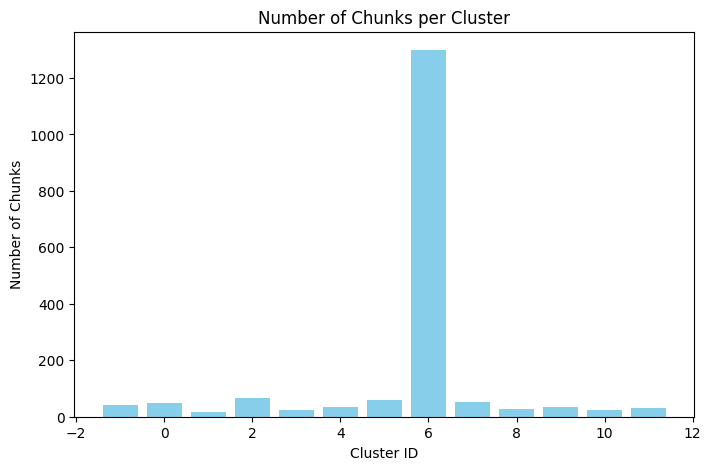

In [17]:

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Count how many chunks belong to each cluster label
cluster_summary = Counter(cluster_labels)

# Print label distribution
print("Cluster distribution:")
for label, count in cluster_summary.items():
    print(f"Cluster {label}: {count} chunks")

# Optional bar chart visualization
plt.figure(figsize=(8, 5))
plt.bar(cluster_summary.keys(), cluster_summary.values(), color="skyblue")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Chunks")
plt.title("Number of Chunks per Cluster")
plt.show()


 UMAP VISUALIZATION OF EMBEDDINGS (2D SCATTERPLOT)

In [35]:
import plotly.express as px
import pandas as pd
import umap

# Step 1: Project to 2D
umap_2d = umap.UMAP(n_components=2, metric="cosine", random_state=42)
points_2d = umap_2d.fit_transform(chunk_embeddings.cpu().numpy())

# Step 2: Create a DataFrame for Plotly
df_umap = pd.DataFrame({
    "UMAP-1": points_2d[:, 0],
    "UMAP-2": points_2d[:, 1],
    "Cluster": cluster_labels
})

# Step 3: Plot using Plotly
fig = px.scatter(
    df_umap,
    x="UMAP-1",
    y="UMAP-2",
    color="Cluster",
    title=" UMAP Projection of Chunk Embeddings (Colored by Cluster)",
    color_continuous_scale='Turbo' if df_umap["Cluster"].nunique() > 10 else None,
    opacity=0.7,
    labels={"Cluster": "Cluster ID"},
)

fig.update_layout(
    template="plotly_white",
    legend_title="Cluster",
    width=800,
    height=600
)

fig.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



STACKED AREA CHART: TOPIC TRENDS OVER TIME

In [19]:

import plotly.express as px

# Make sure date column is datetime
df["Date"] = pd.to_datetime(df["Date"])

# Group by month and topic
df_counts = (
    df.groupby([pd.Grouper(key="Date", freq="M"), "topics"])
      .size()
      .reset_index(name="count")
)

# Normalize counts by month to get proportions
total_per_month = df_counts.groupby("Date")["count"].transform("sum")
df_counts["percentage"] = df_counts["count"] / total_per_month

# Stacked area plot to show relative topic dominance over time
fig = px.area(
    df_counts,
    x="Date",
    y="percentage",
    color="topics",
    title="Topic Trends Over Time (Proportional Share)",
    labels={"percentage": "Share of Topic"},
)

fig.update_layout(
    yaxis=dict(tickformat=".0%"),
    xaxis_title="Month",
    yaxis_title="Topic Share",
    legend_title="Topics"
)

fig.show()


<ipython-input-19-86d82f90fec8>:11: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [28]:
df['Quarter'] = df['Date'].dt.to_period("Q").astype(str)

heatmap_data = (
    df.groupby(["Quarter", "topics"]).size().reset_index(name="count")
)

fig = px.density_heatmap(
    heatmap_data,
    x="Quarter",
    y="topics",
    z="count",
    color_continuous_scale="Viridis",
    title="🔥 Topic Activity Heatmap (by Quarter)",
    labels={"count": "Document Count"}
)

fig.update_layout(template="plotly_white")
fig.show()


Bar Chart – Top Topics Overall

In [29]:
topic_freq = df["topics"].value_counts().reset_index()
topic_freq.columns = ["Topic", "Count"]

fig = px.bar(
    topic_freq.head(10),
    x="Topic",
    y="Count",
    title=" Top 10 Topics by Frequency",
    text="Count"
)
fig.update_layout(template="plotly_white")
fig.show()


Animated Bar Race – Topic Growth Over Time

In [30]:
fig = px.bar(
    df_counts,
    x="count",
    y="topics",
    color="topics",
    animation_frame=df_counts["Date"].dt.strftime("%Y-%m"),
    orientation='h',
    range_x=[0, df_counts["count"].max() + 5],
    title=" Topic Momentum Over Time",
    labels={"count": "Documents", "topics": "Topic"}
)

fig.update_layout(template="plotly_white")
fig.show()


SHOW TOP 10 TERMS PER TOPIC (FROM MMR OUTPUT) — DISPLAY + OPTIONAL EXPORT

In [20]:

import pandas as pd

# Convert MMR results into a DataFrame
topic_words_df = pd.DataFrame([
    {"topic": topic, "top_words": words}
    for topic, words in topic_labels.items()
    if topic != "Outliers"
])

# Sort by topic ID (if numeric)
topic_words_df = topic_words_df.sort_values(by="topic").reset_index(drop=True)

# Print table
print("Top 10 Terms per Topic:")
print(topic_words_df.to_string(index=False))

# Optional: Save to CSV
# topic_words_df.to_csv("topic_keywords.csv", index=False)



Top 10 Terms per Topic:
 topic                                                                                                                                             top_words
    -1                                                                                                                                              Outliers
     0                                                                              pdf toggles released arrows html calendars video key conference decrease
     1                                                                           division board director deputy senior reserve affairs members bank research
     2                                                                projections uncertainty funds confidence rate federal percent table forecasts interval
     3                                                  market open federal board governors chairjohn reserve committeefederal committeepdfplease javascript
     4                            

PLOTLY SUBPLOTS (RESIZED): TOP 10 TERMS FOR EACH TOPIC

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

top_n = 10
topics_to_plot = [cid for cid in cluster_list if cid != -1]
topics_to_plot = sorted(set(topics_to_plot))
num_topics = len(topics_to_plot)

# Layout parameters
cols = 2
rows = (num_topics + cols - 1) // cols
subplot_height = 400  # increased height per row
subplot_width = 1100  # increased width for better label spacing

fig = make_subplots(
    rows=rows, cols=cols,
    subplot_titles=[f"Topic {cid}" for cid in topics_to_plot],
    vertical_spacing=0.12
)

# Plot each topic
for i, topic_id in enumerate(topics_to_plot):
    row = (i // cols) + 1
    col = (i % cols) + 1

    term_scores = ctfidf_matrix[cluster_list.index(topic_id)]
    top_indices = term_scores.argsort()[::-1][:top_n]
    words = [terms[i] for i in top_indices]
    scores = [term_scores[i] for i in top_indices]

    fig.add_trace(
        go.Bar(
            x=scores[::-1],
            y=words[::-1],
            orientation="h",
            name=f"Topic {topic_id}",
            showlegend=False,
            marker_color='steelblue'
        ),
        row=row, col=col
    )

# Final layout adjustments
fig.update_layout(
    height=rows * subplot_height,
    width=subplot_width,
    title_text="Top 10 Words per Topic (by c-TF-IDF Score)",
    margin=dict(t=80, l=60, r=20, b=40),
    font=dict(size=12)
)

fig.update_yaxes(tickfont=dict(size=12))
fig.update_xaxes(title_text="c-TF-IDF Score", tickfont=dict(size=11))

fig.show()


In [22]:
df.sample(5)

,URL,Date,Year,Month,Day,Source,Content,cleaned_text,doc_id,topics
67,https://www.federalreserve.gov/monetarypolicy/...,2019-10-30,2019,10,30,Historical Archive,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...,doc68,inflation participants rate labor growth perce...
83,https://www.federalreserve.gov/monetarypolicy/...,2018-09-26,2018,9,26,Historical Archive,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...,doc84,pdf toggles released arrows html calendars vid...
44,https://www.federalreserve.gov/monetarypolicy/...,2023-02-01,2023,2,1,Main Calendar,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...,doc45,inflation participants rate labor growth perce...
122,https://www.federalreserve.gov/monetarypolicy/...,2015-06-17,2015,6,17,Historical Archive,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...,doc123,pdf toggles released arrows html calendars vid...
31,https://www.federalreserve.gov/monetarypolicy/...,2023-09-20,2023,9,20,Main Calendar,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...,doc32,inflation participants rate labor growth perce...


In [26]:
output_path = "/content/drive/MyDrive/NLP assignment3/FOMC_Topic_Extraction.csv"
df.to_csv(output_path, index=False)
print(f"✅ File saved to: {output_path}")

✅ File saved to: /content/drive/MyDrive/NLP assignment3/FOMC_Topic_Extraction.csv


MULTI-TOPIC ASSIGNMENT PER DOCUMENT (TOP 3 BY CHUNK FREQUENCY)

In [23]:
import pandas as pd

# Step 1: Rebuild the chunks DataFrame if needed
chunks_df = pd.DataFrame({
    "doc_idx": [i for i, sub in enumerate(docs_chunks) for _ in sub],
    "chunk_text": all_chunks,
    "cluster_id": cluster_labels
})
chunks_df["topic_label"] = chunks_df["cluster_id"].map(topic_labels)

# Step 2: Group chunks by document and assign top N topics by frequency
top_n = 3
multi_topic_map = (
    chunks_df.groupby("doc_idx")["topic_label"]
    .agg(lambda x: x.value_counts().index[:top_n].tolist())
    .to_dict()
)

# Step 3: Add multi-topic list to original DataFrame
df["multi_topics"] = df.index.to_series().map(lambda i: multi_topic_map.get(i, []))

# Step 4: Explode to one topic per row (for plotting)
df_exploded = df.explode("multi_topics").rename(columns={"multi_topics": "topics"})

# Step 5 (Optional): View how many docs have multiple topics
df["num_topics_assigned"] = df["multi_topics"].apply(len)
print(df["num_topics_assigned"].value_counts())


num_topics_assigned
3    78
1    49
2     1
Name: count, dtype: int64


In [24]:
df.sample(2)

,URL,Date,Year,Month,Day,Source,Content,cleaned_text,doc_id,topics,multi_topics,num_topics_assigned
51,https://www.federalreserve.gov/monetarypolicy/...,2022-09-21,2022,9,21,Main Calendar,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...,doc52,june projections december september march end ...,[june projections december september march end...,3
1,https://www.federalreserve.gov/monetarypolicy/...,2025-03-19,2025,3,19,Main Calendar,HomeMonetary PolicyFederal Open Market Committ...,homemonetary policyfederal open market committ...,doc2,inflation participants rate labor growth perce...,[inflation participants rate labor growth perc...,2
